## *Supp.Info #3*
This program is part of the Manuscript

# Automatic differential analysis of NMR experiments in complex samples

*
Laure Margueritte,
Petar Markov,
Lionel Chiron,
Jean-Philippe Starck,
Catherine Vonthron-Sénécheau,
Mélanie Bourjot,
and Marc-André Delsuc *

----

Here the active molecule artemisinine is expected to be distributed inequally in all the different fractions.
The concentration of artemisine was then estimated by an activity assay ( *see text* )
It was found that most of the activity was concentrated in fraction 2.
Fraction 6 is an additional sample not used here.

In this analysis, DOSY spectra are analysed, and used to improve the analysis of HSQC spectra.
Only RFE is used in this case.


### Set-up environment

In [1]:
# first load the python environment
from __future__ import print_function
%pylab inline
import os.path as op
import pandas as pd
# Spike environement to show NMR spectra
import sys
sys.path.append("/Users/mad")
import spike
from spike import NPKData

Populating the interactive namespace from numpy and matplotlib

          SPIKE
    Version     : 0.9.0
    Date        : 08-09-2016
    Revision Id : 331
plugins loaded:
bcorr,  Peaks,  urQRd,  Fitter,  Bruker_NMR_FT,  Bucketing,  fastclean,  test,  Linear_prediction,  wavelet,  FTMS_calib,  apmin,  zoom3D,  sg,  rem_ridge, 
type spike.plugins.report() for a short description


In [2]:
# All utilities for loading, cleaning, and displaying bucket lists is in BucketUtilities.py
import BucketUtilities
from BucketUtilities import affiche, loadStd2D, loadInt2D

In [3]:
# This is were all Plasmodesma output is located
direc = r"../DATA/SMARTE_161123"
results = op.join(direc, "Results")

### show report.csv

In [4]:
pd.read_csv( op.join(direc, 'report.csv'), skiprows=2, index_col=(0,1) )

date       PULPROG        SFO1  NS        TE  \
manip          expno                                                       
SMARTE1_161123 1      2016-11-24            zg  700.163291  64  294.9623   
               10     2016-11-24      cosydfph  700.163291   8  295.0593   
               2      2016-11-25            zg  700.163291  64  294.9623   
               20     2016-11-24    dipsi2phpr  700.163291   8  295.0593   
               30     2016-11-24    dstebpgp3s  700.163291  32  294.9623   
               40     2016-11-24      hsqcetgp  700.163292   4  294.9623   
               50     2016-11-24  hmbcgplpndqf  700.163292  48  294.9623   
SMARTE2_161123 1      2016-11-25            zg  700.163291  64  294.9623   
               10     2016-11-25      cosydfph  700.163291   8  294.9623   
               2      2016-11-25            zg  700.163291  64  294.9623   
               20     2016-11-25    dipsi2phpr  700.163291   8  294.9623   
               30     2016-11-25    dstebpgp3s  700.163291  32  294.9623   
               40     2016-11-25      hsqcetgp  700.163292   4  294.9623   
               50     2016-11-25  hmbcgplpndqf  700.163292  48  294.9623   
SMARTE3_161123 1      2016-11-23            zg  700.163291  64  294.9623   
               10     2016-11-23      cosydfph  700.163291   8  294.9623   
               2      2016-11-24            zg  700.163291  64  294.9623   
               20     2016-11-23    dipsi2phpr  700.163291   8  294.9623   
               30     2016-11-23    dstebpgp3s  700.163291  32  294.9623   
               40     2016-11-23      hsqcetgp  700.163292   4  294.9623   
               50     2016-11-23  hmbcgplpndqf  700.163292  48  295.0593   
SMARTE4_161123 1      2016-11-25            zg  700.163291  64  294.9623   
               10     2016-11-25      cosydfph  700.163291   8  294.9623   
               2      2016-11-26            zg  700.163291  64  295.0593   
               20     2016-11-25    dipsi2phpr  700.163291   8  294.9623   
               30     2016-11-25    dstebpgp3s  700.163291  32  294.9623   
               40     2016-11-25      hsqcetgp  700.163292   4  294.9623   
               50     2016-11-25  hmbcgplpndqf  700.163292  48  295.0593   
SMARTE5_161123 1      2016-11-26            zg  700.163291  64  294.9623   
               10     2016-11-26      cosydfph  700.163291   8  295.0593   
               2      2016-11-26            zg  700.163291  64  294.9623   
               20     2016-11-26    dipsi2phpr  700.163291   8  294.9623   
               30     2016-11-26    dstebpgp3s  700.163291  32  294.9623   
               40     2016-11-26      hsqcetgp  700.163292   4  294.9623   
               50     2016-11-26  hmbcgplpndqf  700.163292  48  294.9623   
SMARTE6_161123 1      2016-11-27            zg  700.163291  64  294.9623   
               10     2016-11-27      cosydfph  700.163291   8  294.9623   
               2      2016-11-28            zg  700.163291  64  294.9623   
               20     2016-11-27    dipsi2phpr  700.163291   8  295.0593   
               30     2016-11-27    dstebpgp3s  700.163291  32  294.9623   
               40     2016-11-27      hsqcetgp  700.163292   4  294.9623   
               50     2016-11-27  hmbcgplpndqf  700.163292  48  294.9623   

                         TD    RG         SW      O1   D1     P1  \
manip          expno                                               
SMARTE1_161123 1      16384    18  12.022208  3291.2  1.5  10.25   
               10      4096    18  12.022208  3291.2  1.5  10.25   
               2      16384    18  12.022208  3291.2  1.5  10.25   
               20      4096    64  12.022208  3291.2  1.5  10.25   
               30      4096   128  12.022208  3291.2  1.5  10.25   
               40      2048  2050  10.986448  3292.0  1.5  10.25   
               50      4096  2050  10.986448  3292.0  1.5  10.25   
SMARTE2_161123 1      16384    18  12.022208  3291.2  1.5   7.58   
   

### report of the processing

In [5]:
pd.read_csv( op.join(direc, 'analysis.csv'), skiprows=1, index_col=(0,1) )

type                            file  \
manip           expno                                                 
SMARTE1_161123 1                 1D                1_bucketlist.csv   
               1                 1D                  1_peaklist.csv   
               2                 1D                2_bucketlist.csv   
               2                 1D                  2_peaklist.csv   
               10          cosydfph      cosydfph_10_bucketlist.csv   
               10          cosydfph        cosydfph_10_peaklist.csv   
               20        dipsi2phpr    dipsi2phpr_20_bucketlist.csv   
               20        dipsi2phpr      dipsi2phpr_20_peaklist.csv   
               30        dstebpgp3s    dstebpgp3s_30_bucketlist.csv   
               30        dstebpgp3s      dstebpgp3s_30_peaklist.csv   
               50      hmbcgplpndqf  hmbcgplpndqf_50_bucketlist.csv   
               50      hmbcgplpndqf    hmbcgplpndqf_50_peaklist.csv   
               40          hsqcetgp      hsqcetgp_40_bucketlist.csv   
               40          hsqcetgp        hsqcetgp_40_peaklist.csv   
SMARTE2_161123 1                 1D                1_bucketlist.csv   
               1                 1D                  1_peaklist.csv   
               2                 1D                2_bucketlist.csv   
               2                 1D                  2_peaklist.csv   
               10          cosydfph      cosydfph_10_bucketlist.csv   
               10          cosydfph        cosydfph_10_peaklist.csv   
               20        dipsi2phpr    dipsi2phpr_20_bucketlist.csv   
               20        dipsi2phpr      dipsi2phpr_20_peaklist.csv   
               30        dstebpgp3s    dstebpgp3s_30_bucketlist.csv   
               30        dstebpgp3s      dstebpgp3s_30_peaklist.csv   
               50      hmbcgplpndqf  hmbcgplpndqf_50_bucketlist.csv   
               50      hmbcgplpndqf    hmbcgplpndqf_50_peaklist.csv   
               40          hsqcetgp      hsqcetgp_40_bucketlist.csv   
               40          hsqcetgp        hsqcetgp_40_peaklist.csv   
SMARTE3_161123 1                 1D                1_bucketlist.csv   
               1                 1D                  1_peaklist.csv   
...                             ...                             ...   
SMARTE4_161123 40          hsqcetgp      hsqcetgp_40_bucketlist.csv   
               40          hsqcetgp        hsqcetgp_40_peaklist.csv   
SMARTE5_161123 1                 1D                1_bucketlist.csv   
               1                 1D                  1_peaklist.csv   
               2                 1D                2_bucketlist.csv   
               2                 1D                  2_peaklist.csv   
               10          cosydfph      cosydfph_10_bucketlist.csv   
               10          cosydfph        cosydfph_10_peaklist.csv   
               20        dipsi2phpr    dipsi2phpr_20_bucketlist.csv   
               20        dipsi2phpr      dipsi2phpr_20_peaklist.csv   
               30        dstebpgp3s    dstebpgp3s_30_bucketlist.csv   
               30        dstebpgp3s      dstebpgp3s_30_peaklist.csv   
               50      hmbcgplpndqf  hmbcgplpndqf_50_bucketlist.csv   
               50      hmbcgplpndqf    hmbcgplpndqf_50_peaklist.csv   
               40          hsqcetgp      hsqcetgp_40_bucketlist.csv   
               40          hsqcetgp        hsqcetgp_40_peaklist.csv   
SMARTE6_161123 1                 1D                1_bucketlist.csv   
               1                 1D                  1_peaklist.csv   
               2                 1D                2_bucketlist.csv   
               2                 1D                  2_peaklist.csv   
               10          cosydfph      cosydfph_10_bucketlist.csv   
               10          cosydfph        cosydfph_10_peaklist.csv   
               20        dipsi2phpr    dipsi2phpr_20_bucketlist.csv   
               20        dipsi2phpr      dipsi2phpr_20_

# DOSY bucket lists
One DOSY bucket intensity list  is shown here as example.
DOSY do not present chemical shifts along the vertical axis, but rather a diffusion coefficient.
In the sake of simplicity, and as the purpose here is not coefficient diffusion measurement but rather species detection, the same 2D bucket procedure ppm-oriented was used.
So DOSY bucket lists are shown with fake ppm along the vertical axis, actually related to $log(Diff)$.

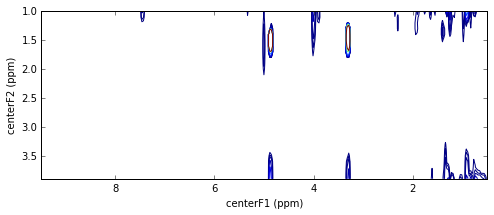

In [6]:
# reference sample
BucketUtilities.NETMODE = 'encore'  # this is the soft-thresholding algo
Im1 = loadStd2D(op.join(results, r"SMARTE1_161123/2D/dstebpgp3s_30_bucketlist.csv"), net=True, sym=False)
# then display
affiche(*Im1, scale=10, figsize=(8,3))

# Regression Analysis

Load the area of the 6 experiments in matrix X

In [7]:
X = []
for i in range(1,6):
    tit = op.join(results, r"SMARTE{}_161123/2D/dstebpgp3s_30_bucketlist.csv".format(i) )
    print (tit)
    Int = loadInt2D(tit, net=True, sym=False)
    tInt = Int[2].ravel() # [tmask]
    X.append(tInt)
X = np.array(X)
print ("X.shape", X.shape, Int[2].shape)

../DATA/SMARTE_161123/Results/SMARTE1_161123/2D/dstebpgp3s_30_bucketlist.csv
../DATA/SMARTE_161123/Results/SMARTE2_161123/2D/dstebpgp3s_30_bucketlist.csv
../DATA/SMARTE_161123/Results/SMARTE3_161123/2D/dstebpgp3s_30_bucketlist.csv
../DATA/SMARTE_161123/Results/SMARTE4_161123/2D/dstebpgp3s_30_bucketlist.csv
../DATA/SMARTE_161123/Results/SMARTE5_161123/2D/dstebpgp3s_30_bucketlist.csv
X.shape (5, 9030) (30, 301)


Load activities in normalized units

In [8]:
Y = np.array([0.0, 1.0, 0.0, 0.0, 0.0])  # fraction 2 is active

compute a linear model using scikit-learn; 

In [9]:
import sklearn
from sklearn import linear_model
from sklearn.feature_selection import RFE

comparing linearregression and RFE

In [10]:
# LinearReg
Threshold = 2E-12   # keep only points above the threshold

reg = linear_model.LinearRegression()
reg.fit(X,Y)
coefmask = (reg.coef_)> Threshold
coef = reg.coef_[coefmask]
tcoefmask = np.where(coefmask.ravel()>0)[0]
N = len(Int[2].ravel())
dosy = np.zeros(N)
dosy[tcoefmask] = 1.0
dosy = dosy.reshape(Int[2].shape)

# RFE
NFeatures = 120    # keep only this number of points

estimator = linear_model.LinearRegression()
selector = RFE(estimator, step=0.5, n_features_to_select=NFeatures)
selector = selector.fit(X, Y)
dosyrfe = np.zeros(N)
dosyrfe[selector.support_] = 1.0
dosyrfe = dosyrfe.reshape(Int[2].shape)


Interest of the DOSY analysis is to extract a 1D profile of the $^{1}$H spectrum, so we use only the horizontal projection of the analysis

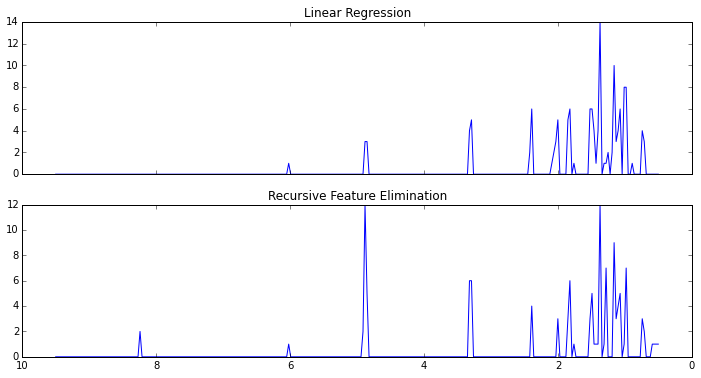

In [12]:
dosy1D = dosy.sum(axis=0)
dosyrfe1D = dosyrfe.sum(axis=0)

f1, (ax1,ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,6))
ax1.set_title('Linear Regression')
ax1.plot(Int[0][0], dosy1D)

ax2.set_title('Recursive Feature Elimination')
ax2.plot(Int[0][0], dosyrfe1D)
ax2.invert_xaxis()
f1.savefig("FigDOSY1D.pdf")

So both profiles are very similar.
We can compare them to the Artemisinine spectrum acquired in the previous (ARTE) series.

loading 1D


1D data-set
Axis F1 :NMR axis at 700.163291 MHz,  16384 real points,  from -1.338763 ppm (-937.352401 Hz) to 10.683445 ppm  (7480.156016 Hz)
data-set is real

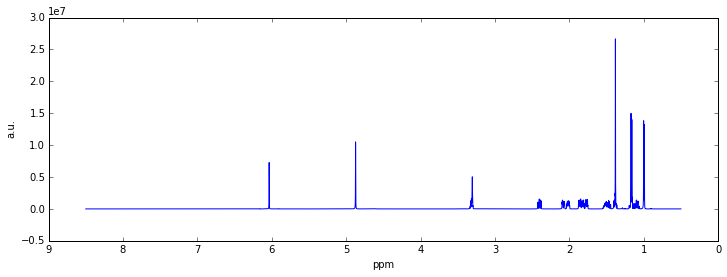

In [13]:
d = NPKData.NPKData(name="../DATA/ARTE_160816/ARTEref/1/processed.gs1")
d.unit = 'ppm'
f,ax = plt.subplots(figsize=(12,4))
d.display(figure=ax, zoom=[0.5,8.5])

#  using the 1D profile from DOSY to determined template to improve HSQC results
The same analysis can be performed on all spectra types. Here on **HSQC** spectra.


In [14]:
# load data
H = []
for i in range(1,6):
    tit =  op.join(results, r"SMARTE{}_161123/2D/hsqcetgp_40_bucketlist.csv".format(i) )
    print (tit)
    Int = loadInt2D(tit, net=True, sym=False)
    tInt = Int[2].ravel() # [tmask]
    H.append(tInt)
H = np.array(H)
print (H.shape, Int[2].shape)

../DATA/SMARTE_161123/Results/SMARTE1_161123/2D/hsqcetgp_40_bucketlist.csv
../DATA/SMARTE_161123/Results/SMARTE2_161123/2D/hsqcetgp_40_bucketlist.csv
../DATA/SMARTE_161123/Results/SMARTE3_161123/2D/hsqcetgp_40_bucketlist.csv
../DATA/SMARTE_161123/Results/SMARTE4_161123/2D/hsqcetgp_40_bucketlist.csv
../DATA/SMARTE_161123/Results/SMARTE5_161123/2D/hsqcetgp_40_bucketlist.csv
(5, 44247) (147, 301)


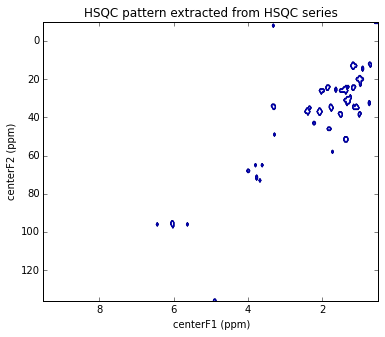

In [15]:
# Linear Regression using RFE (Recursive Feature Elimination)
NFeatures = 150  # we want a small number

estimator = linear_model.LinearRegression()
selector = RFE(estimator, step=0.5, n_features_to_select=NFeatures)
selector = selector.fit(H,Y)
N = len(Int[2].ravel())
mrfe = np.zeros(N)
mrfe[selector.support_] = 1.0
mrfe = mrfe.reshape(Int[2].shape)

f1, ax = plt.subplots( figsize=(6,5))
#ax1.set_title('Linear Regression')
#affiche(Int[0], Int[1], m, scale=0.1, ax=ax1)
ax.set_title('HSQC pattern extracted from HSQC series')
affiche(Int[0], Int[1], mrfe, scale=0.1, ax=ax)

There are still unwanted features

# filtering

consists in keepin in the HSQC only those column selected in the DOSY

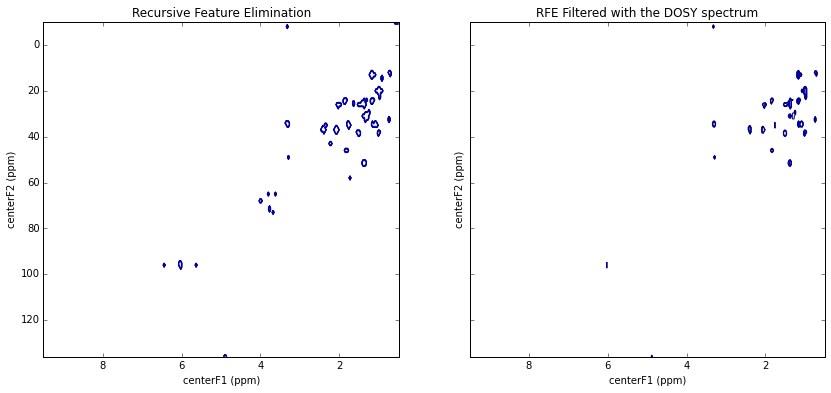

In [16]:
hsqc_filtered = mrfe*dosy1D

f1, (ax1,ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(14,6))
ax1.set_title('Recursive Feature Elimination')
affiche(Int[0], Int[1], mrfe, scale=0.1, ax=ax1)
ax2.set_title('RFE Filtered with the DOSY spectrum')
affiche(Int[0], Int[1], hsqc_filtered, scale=0.1, ax=ax2, reverse=False)


to be compared with the HSQC spectrum of artemisinin

In [17]:
d = NPKData.NPKData(name="../DATA/ARTE_160816/ARTEref/40/processed.gs2")
d.unit = 'ppm'

loading 2D


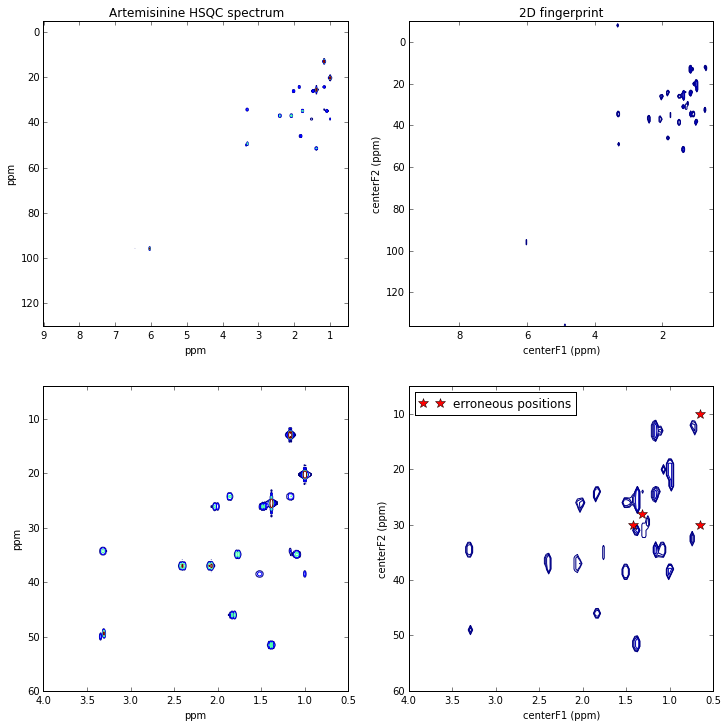

In [20]:
f1, ((ax2,ax1),(ax4,ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
affiche(Int[0], Int[1], hsqc_filtered, scale=0.1,ax=ax1)
ax1.set_title('2D fingerprint')
d.display(figure=ax2, scale=3, zoom=[[-5,130],[0.5,9]])
ax2.set_title('Artemisinine HSQC spectrum')

affiche(Int[0], Int[1], hsqc_filtered, scale=0.1,ax=ax3, reverse=False) 
d.display(figure=ax4, scale=5, zoom=[[4,60],[0.5,4]] )
ax3.set_xlim(xmin=0.5, xmax=4)
ax3.set_ylim(ymin=5, ymax=60)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.plot([1.42, 1.32,0.65,0.65], [30,28,10,30], 'r*', ms=10, label='erroneous positions')
ax3.legend(loc=2)
f1.savefig("FigDOSYHSQC.pdf")

It can be seen that the determined pattern is very similar to the genuine Artemisinine HSQC spectrum. Only a few additional spurious location can be seen, noted here with a red star.

Just for information, here is the superposed HSQC spectra of all fractions from which the spectrum of artemisinin has successfully been extracted:

loading 2D
loading 2D
loading 2D
loading 2D
loading 2D


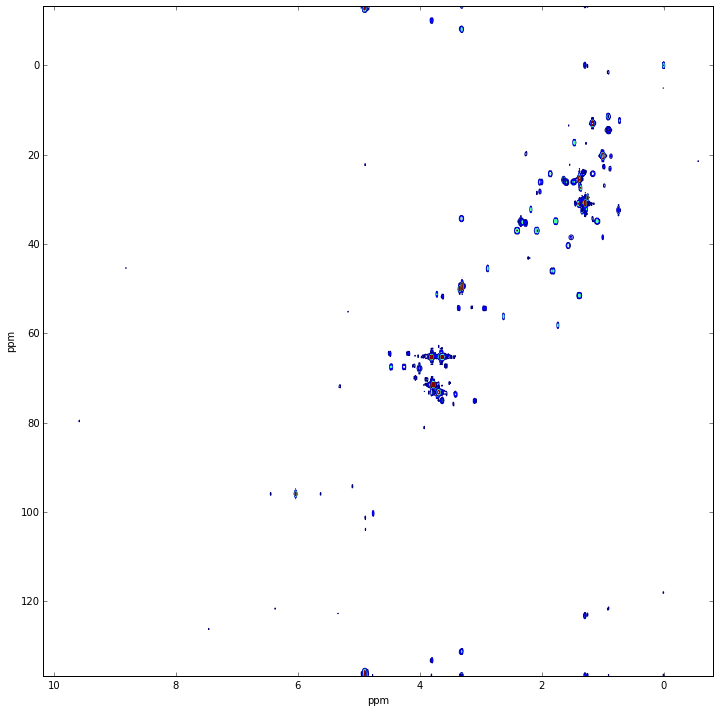

In [31]:
plt.figure(figsize=(12,12))
for i in range(1,6):
    d = NPKData.NPKData(name="../DATA/SMARTE_161123/SMARTE{}_161123/40/processed.gs2".format(i))
    d.unit = 'ppm'
    d.display(scale=4, new_fig=False)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()